<a href="https://colab.research.google.com/github/MichaelBarfuss/Intro-to-Analytics/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
!pip install pingouin
import pingouin as pg
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_1samp
from scipy.stats import norm

In [3]:
import pandas as pd
from scipy import stats


# **Question 1**

ON Paper

# **C**

In [4]:
S=norm.pdf(175,215,20)
S

0.002699548325659403

In [5]:
1-S

0.9973004516743406

# **D**

In [6]:
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size = 2, alpha = 0.05, nobs1= 10, alternative = 'larger')#nobs1= sample size
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 1.0


The sample size was only needed for 7 so our sample size was 10. That means the sample size is adequate.

# **Question 2**

Independant

In [7]:
temp= 97.8, 97.2, 97.4, 97.6, 97.8, 97.9, 98.0, 98.0, 98.0, 98.1, 98.2, 98.3, 98.3, 98.4, 98.4, 98.4, 98.5, 98.6, 98.6, 98.7, 98.8, 98.8, 98.9, 98.9,99.0
can=np.array(temp)

In [8]:
can.std()

0.4723388614120164

A

In [9]:
ttest_1samp(a=temp, popmean= 98.6 )

TtestResult(statistic=-3.484907217309078, pvalue=0.0019124143827446436, df=24)

In [10]:
t_stat, p_value= ttest_1samp(a=temp, popmean= 98.6)

In [11]:
p_value

0.0019124143827446436

In [12]:
if p_value < 0.05:
  print("We reject the null hypothesis")

else:
  print("We fail to rejet the null hypothesis")

We reject the null hypothesis


B

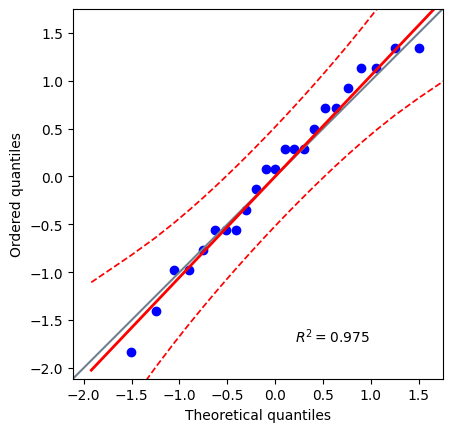

In [13]:
#Normality Check
pg.qqplot(temp)
plt.show()

C

In [14]:
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size = 1.2, alpha = 0.05, nobs1= 25, alternative = 'larger')#nobs1= sample size
print('The power for the hypothesis testing is', round(power, 2))

The power for the hypothesis testing is 0.99


In [15]:
0.6 /0.5

1.2

D

In [16]:
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = 1.2, alpha = 0.05, power = 0.9, alternative = 'larger')#effect size= d ratio, #alternative= 'two-sided', 'larger', 'smaller'
# Print results
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 13


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)


The Sample size would need to only be 13

# **Question 3**

Dependant

In [17]:
low= 242,249,235,250,254,244,258,311,237,261,314,252
high=302,421,419,399,317,311,350,363,392,367,301,302
lmean=np.array(low)
hmean=np.array(high)

A

There is evedience to support the claim that mean grinding forces increases with the vibration level. The p value is small.

In [18]:
ttest_rel(a=low, b= high)

TtestResult(statistic=-5.507637163934782, pvalue=0.0001841076423203466, df=11)

B

In [19]:
ttest_rel(a=low, b= high).confidence_interval(confidence_level=.95)

ConfidenceInterval(low=-132.61439406056866, high=-56.885605939431336)

C

The value 0 is not contatined in the interval.  It is connected to part A by the test statistic exceeds the other t value and the P-value is less than 0.001
Therefore, two methods yield different results.

D

In [ ]:
pg.qqplot(high)
plt.show()

In [ ]:
pg.qqplot(low)
plt.show()

Not really, Only on the plot of low grinding force was it slightly not normal, but they are both normally distributed.

# **Question 4**

Dependant

In [22]:
Before=22,20,19,24,25,25,28,22,30,27,24,18,16,19,19,28,24,25,25,23
After = 24,22,19,22,28,26,28,24,30,29,25,20,17,18,18,28,26,27,27,24

In [23]:
ttest_rel(a=Before, b= After)

TtestResult(statistic=-3.22617331116718, pvalue=0.004445370704412229, df=19)

The Pvalue isn't as high as the last one but still indicates that the null hypthesis isn't Ud /=0.

In [29]:
if p_value < 0.05:
  print("We reject the null hypothesis")

else:
  print("We fail to rejet the null hypothesis")

We reject the null hypothesis


In [30]:
ttest_rel(a=Before, b= After).confidence_interval(confidence_level=.95)


ConfidenceInterval(low=-1.5663254915057514, high=-0.3336745084942485)

0 is barely not in the confidence level which tells me the two methods have different resluts barely.
